# Day 29: Why Scaling Matters + Regularization Introduction (Type A)

In [1]:
# Standard Week 3 data load (use in all Foundation Drilling)
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Verify
print(df.shape)  # (20640, 9)
print(df.columns.tolist())

(20640, 9)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


## FOUNDATION DRILLING (MANDATORY)

### Part 1: Python Pattern — try/except

In [2]:
# Basic pattern
# try:
#     risky_code()
# except SpecificError:
#     handle_error()

# Real example
# try:
#     result = int(user_input)
# except ValueError:
#     result = 0
#     print("Invalid number, using 0")
# Translation: "Try this code. If it fails with ValueError, do this instead."

# Key insight: Always catch SPECIFIC exceptions, not bare except:


In [3]:
# Task 1: Write try/except that handles division by zero

# Attempt to calculate: 10 / 0
# On ZeroDivisionError: print "Cannot divide by zero", set result = None
# After the try/except: print the result

try:
    result = 10 / 0
except ZeroDivisionError:
    result = None
    print("Cannot divide by zero")

print(result)

Cannot divide by zero
None


In [4]:
# Task 2: Write try/except for type conversion

# Given: value = "not_a_number"
# Attempt to convert to float
# On ValueError: print "Invalid input", set converted = 0.0
# After the try/except: print the converted value

value = "not_a_number"

try:
    converted = float(value)
except ValueError:
    converted = 0.0
    print("Invalid input")

print(converted)

value = "123.45"
try:
    converted = float(value)
except ValueError:
    converted = 0.0
    print("Invalid input")
print(f"\n{converted}")

Invalid input
0.0

123.45


### Part 2: Scaling Workflow Drilling (from memory)

**Task:** Write the complete scaling pipeline from memory. No looking back.

Include:

1. Import StandardScaler
2. Create scaler object
3. fit_transform on X_train (what does this return?)
4. transform on X_test (why NOT fit_transform?)

**Verbal precision check (answer each in one sentence):**

- **Why do we fit only on training data?** Testing data must remain untouched in order to verify the quality of the model's predictions on new/unseen data.
- **What information does the scaler "learn" during fit()?** It learns the mean & std of the data
- **Name two algorithm categories that need scaling and one that doesn't.** Need: distance-based algorithms (KNN, SVM) & gradient-based algorithms (Neural Networks); Don't Need: closed-form solutions (Linear Regression [ normal equation ])

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

df['bedroom_ratio'] = df['AveBedrms'] / df['AveRooms']
df['rooms_per_person'] = df['AveRooms'] / df['AveOccup']
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                'Latitude', 'Longitude', 'bedroom_ratio', 'rooms_per_person']
X = df[feature_cols]
y = df['MedHouseVal']

scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

print(f"\nX_train_scaled first feature - mean: {X_train_scaled[:, 0].mean():.4f}, std: {X_train_scaled[:, 0].std():.4f}")

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

predictions_scaled = model_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, predictions_scaled)
mae_scaled = mean_absolute_error(y_test, predictions_scaled)

print(f"\nScaled Model Results:")
print(f"R²: {r2_scaled:.4f}")
print(f"MAE: ${mae_scaled * 100000:,.0f}")

X_train_scaled shape: (16512, 8)
X_test_scaled shape: (4128, 8)

X_train_scaled first feature - mean: -0.0000, std: 1.0000

Scaled Model Results:
R²: 0.6511
MAE: $48,709


In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,bedroom_ratio,rooms_per_person
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,0.146591,2.732919
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0.155797,2.956685
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,0.129516,2.957661
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,0.184458,2.283154
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,0.172096,2.879646


### Part 3: Visualization Drill (replacing SQL — see handoff note)

**Task:** Create histogram of MedInc showing before/after StandardScaler transformation

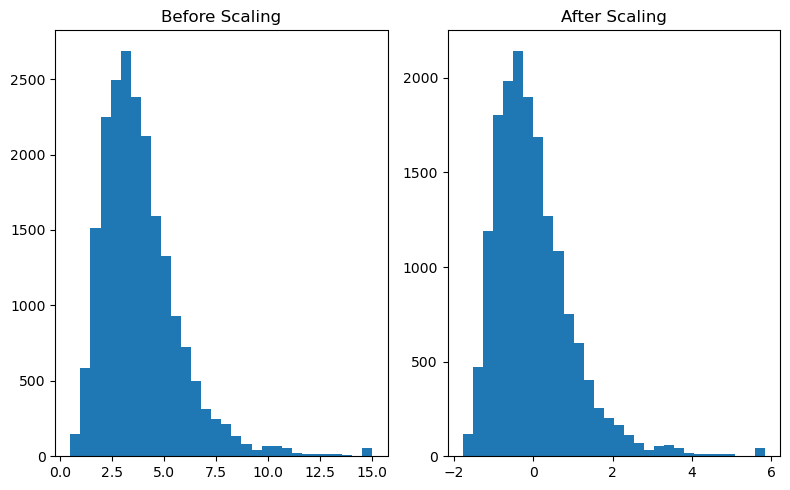

In [7]:
# Pattern Reminder:

# fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# axes[0].hist(data_before, bins=30)
# axes[0].set_title('Before Scaling')
# axes[1].hist(data_after, bins=30)
# axes[1].set_title('After Scaling')
# plt.tight_layout()

fig, axes = plt.subplots(1,2,figsize=(8,5))
axes[0].hist(df['MedInc'], bins=30)
axes[0].set_title('Before Scaling')
axes[1].hist(X_train_scaled[:,0], bins=30)
axes[1].set_title('After Scaling')
plt.tight_layout()
plt.show()

## CONCEPTUAL ANCHOR: Regularization

**Resource:** StatQuest — "Regularization Part 1: Ridge Regression"

- "[StatQuest Ridge Regression](https://youtu.be/Q81RR3yKn30?si=KnBLwPMWFEBWSHgz)" on YouTube
- Duration: ~20 minutes

**Focus questions while watching:**

**1. What problem does regularization solve? (one sentence)** prevents overfitting the model on the training data

**2. What does the Ridge penalty term add to the loss function?** Lambda creates a penalty to the slope, creating a small bias but less variance; also helps solve for variables when the data isn't large enough to form equal known points to the number of variables [Technical version: Ridge adds λ × sum of squared coefficients to the loss function. This penalizes large coefficients.]

**3. What happens to coefficients as alpha increases?** the larger lambda gets, our predictions for Y-axis becomes less sensitive to X-axis [Technical version: Coefficients get smaller in magnitude (approach zero but never reach it). As λ (alpha in sklearn) increases, coefficients shrink toward zero → predictions become less sensitive to feature values.]

**4. Why does Ridge need features to be on the same scale?** so that the lambda penalty effects everything evenly [Expanded: If one feature ranges 0-50000 (Population) and another ranges 0-1 (bedroom_ratio), their coefficients will naturally be very different sizes to make predictions work. The penalty λ × coefficient² will hit them unequally. Scaling puts them on equal footing so the penalty is fair.]

**After watching:** Write your answers before proceeding to Block 1.

**My note to Claude** None of the questions were specifically addressed, or answered, in the StatQuest video. So, I am inferring the answers. The video covered how the math of the Ridge interacts with the data on the graph

## BLOCK 1: Why Scaling Matters — KNN Demonstration

**Goal:** See scaling create a measurable performance difference (unlike Day 28's LinearRegression).

**Why KNN needs scaling:**
KNN predicts by finding the K nearest neighbors based on *distance*. If one feature has range [0, 35000] (Population) and another has range [32, 42] (Latitude), Population completely dominates the distance calculation. Scaling puts all features on equal footing.

In [8]:
# Setup (standard Week 3 load)

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
import pandas as pd

# Load data
housing = fetch_california_housing(as_frame=True)
df = housing.frame

# Use your 8-feature model from Day 26
feature_cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms',
                'Latitude', 'Longitude', 'bedroom_ratio', 'rooms_per_person']

# Add engineered features
df['bedroom_ratio'] = df['AveBedrms'] / df['AveRooms']
df['rooms_per_person'] = df['AveRooms'] / df['AveOccup']

X = df[feature_cols]
y = df['MedHouseVal']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (16512, 8)
X_test shape: (4128, 8)


### Experiment 1: KNN on Unscaled Data

In [11]:
# Fit KNN without scaling
knn_unscaled = KNeighborsRegressor(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
pred_unscaled = knn_unscaled.predict(X_test)
r2_unscaled = r2_score(y_test, pred_unscaled)

print(f"KNN (unscaled) R²: {r2_unscaled:.4f}")

# Translation: "For each test point, find the 5 nearest training points (by distance), average their y-values, use that as prediction."

## How KNN Works (Critical for Understanding Scaling Impact)

# KNN = K-Nearest Neighbors

# Algorithm steps:
# 1. Given a new house to predict, look at all training houses
# 2. Calculate distance from new house to every training house
# 3. Find the K=5 closest training houses
# 4. Average their prices → that's your prediction

# Distance calculation (Euclidean):
# distance = sqrt((MedInc_diff)² + (HouseAge_diff)² + ... + (rooms_per_person_diff)²)

KNN (unscaled) R²: 0.6916


In [13]:
print(X_train.describe().loc[['min', 'max']])

# You'll see something like:
# - `MedInc`: 0.5 to 15 (range ~14.5)
# - `HouseAge`: 1 to 52 (range ~51)
# - `Latitude`: 32 to 42 (range ~10)
# - `AveRooms`: 0.8 to 141 (range ~140)
# - `Population` (if included): Would be 3 to 35,000+ (range ~35,000)

# The distance formula treats all these equally:

# distance = sqrt(
#     (MedInc_diff)² +      # Contributes maybe 0-225
#     (HouseAge_diff)² +    # Contributes maybe 0-2,500
#     (AveRooms_diff)² +    # Contributes maybe 0-20,000
#     ...
# )

# AveRooms differences dominate the distance even though they might be less important than MedInc for predicting price.

      MedInc  HouseAge    AveRooms  AveBedrms  Latitude  Longitude  \
min   0.4999       1.0    0.888889   0.333333     32.55    -124.35   
max  15.0001      52.0  141.909091  25.636364     41.95    -114.31   

     bedroom_ratio  rooms_per_person  
min            0.1          0.002547  
max            1.0         52.033333  


**Why R² = 0.6916 is Actually Pretty Bad for This Data**

**For comparison:**
- Your Day 26 LinearRegression probably got R² ~0.60-0.65
- KNN should be competitive or better
- 0.69 suggests it's working but handicapped

**The handicap: Features with larger ranges are controlling the "nearest neighbor" decisions.**

### Experiment 2: KNN on Scaled Data

**Task:** Apply your scaling workflow, then fit KNN on scaled data.

In [14]:
# Your code here:
# 1. Create StandardScaler
# 2. fit_transform on X_train
# 3. transform on X_test
# 4. Fit KNeighborsRegressor(n_neighbors=5) on scaled data
# 5. Predict and calculate R²

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsRegressor(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
pred_scaled = knn_scaled.predict(X_test_scaled)
r2_scaled = r2_score(y_test, pred_scaled)

print(f"KNN (scaled) R2: {r2_scaled:.4f}")

KNN (scaled) R2: 0.7340


### Analysis Questions (answer with exact numbers)

1. What is the R² improvement from scaling? (scaled - unscaled)
Answer: ___0.0424 improvement____
2. What is the percentage improvement? ((scaled - unscaled) / unscaled × 100)
Answer: ___6.13____%
3. Why did scaling help KNN but not LinearRegression? LinearRegression uses a closed-form solution that's scale-invariant; KNN uses distance calculations between points, so features with larger ranges (like AveRooms 0-141) dominate the distance metric over smaller-range features (like Latitude 32-42), distorting which points are considered 'nearest'.

## BLOCK 2: Ridge Regression Introduction

**Goal:** Implement regularization and understand why it also requires scaling.

### Why Regularization Needs Scaling

Ridge adds a penalty: α × Σ(coefficient²)

If features have different scales:

- Large-scale feature → small coefficient (to make predictions reasonable)
- Small-scale feature → large coefficient

The penalty hits these unequally. Scaling ensures the penalty treats all features fairly.

**Task 1:** Ridge Vs LinearRegression Comparison

In [15]:
from sklearn.linear_model import Ridge, LinearRegression

# Use your scaled data from Block 1

# Standard LinearRegression (for comparison)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)
r2_lr = r2_score(y_test, pred_lr)

# Ridge with default alpha=1.0
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)
r2_ridge = r2_score(y_test, pred_ridge)

print(f"LinearRegression R²: {r2_lr:.4f}")
print(f"Ridge (α=1.0) R²: {r2_ridge:.4f}")


LinearRegression R²: 0.6511
Ridge (α=1.0) R²: 0.6511


**Task 2: Coefficient Comparison**

In [16]:
coef_comparison = pd.DataFrame({
    'feature': feature_cols,
    'LinearRegression': lr.coef_,
    'Ridge': ridge.coef_,
    'difference': lr.coef_ - ridge.coef_
})
print(coef_comparison.round(4))


            feature  LinearRegression   Ridge  difference
0            MedInc            0.7884  0.7885     -0.0001
1          HouseAge            0.1174  0.1175     -0.0001
2          AveRooms           -0.1437 -0.1438      0.0001
3         AveBedrms           -0.2256 -0.2254     -0.0002
4          Latitude           -0.8967 -0.8959     -0.0008
5         Longitude           -0.8426 -0.8418     -0.0008
6     bedroom_ratio            0.2422  0.2422      0.0001
7  rooms_per_person            0.5134  0.5132      0.0002


**Questions (answer precisely):**

**1. Which coefficient shrank the most in absolute terms?**

Feature: __Latitude & Longitude__, Shrinkage: ___-0.0008___

**2. Did any coefficient change sign (positive → negative or vice versa)?**

Answer: No

**3. Are Ridge's coefficients generally larger or smaller than LinearRegression's in absolute value?**

Answer: Mixed, some are smaller some are larger. But if all differences are added, there is a net difference of -0.0017 (17 ten-thousandths closer to zero, overall)

### Task 3: Alpha Effect (Conceptual)

**Task:** Try three alpha values and observe the pattern.

In [17]:
for alpha in [0.01, 1.0, 100.0]:
    ridge_test = Ridge(alpha=alpha)
    ridge_test.fit(X_train_scaled, y_train)
    r2 = r2_score(y_test, ridge_test.predict(X_test_scaled))
    max_coef = np.max(np.abs(ridge_test.coef_))
    print(f"α={alpha:6.2f} | R²: {r2:.4f} | Max |coef|: {max_coef:.4f}")


α=  0.01 | R²: 0.6511 | Max |coef|: 0.8967
α=  1.00 | R²: 0.6511 | Max |coef|: 0.8959
α=100.00 | R²: 0.6498 | Max |coef|: 0.8220


**Pattern observed:**

As alpha increases, coefficients get smaller and R² decreases.

## END OF DAY: Reflection

**Technical precision check (exact answers required):**

**1. KNN unscaled R²:** 0.6916

**2. KNN scaled R²:** 0.7340

**3. The difference proves that distance-based algorithms need scaling because the distance calculation (sqrt of sum of squared differences) is dominated by features with larger ranges**

**4. Ridge (α=1.0) R²:** 0.6511

**5. As alpha increases from 0.01 to 100, the maximum coefficient magnitude decreases from 0.8967 to 0.8220 (~8%).**

**Conceptual check:**

**1. In one sentence: Why does KNN need scaling but Decision Trees don't?** Decision Trees split on individual feature thresholds, which don't depend on other features' scales, while KNN calculates distances across all features simultaneously.

**2. In one sentence: Why does Ridge regression need scaled features?** The Ridge penalty (α × Σcoef²) treats all coefficients equally only when features are on the same scale."

**Metacognitive check:**

**1. Did you answer questions 1-5 with exact values, or did you use words like "approximately" or "around"?** Exact, with a bonus approximation on number 5. 
